Source: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hotellings_Two-Sample_T2.pdf


Example in this notebook:

* We live in a 2D world with a 2D GPS
* There is a point $y_{p}$ in 2D world that we know up to some covariance $S_{p}$
* Now we get multiple datasets with samples from a 2D GPS and we want to test if these where recorded at point $p$.
* We will number these datsets with letters from A to B. Each dataset has 100 points. The sample mean will be called $y_{A} ... y_{B}$ and the sample covariances $S_{A} ... S_{B}$. The samples itself will be an array called $Q_{A}..Q_{B}$





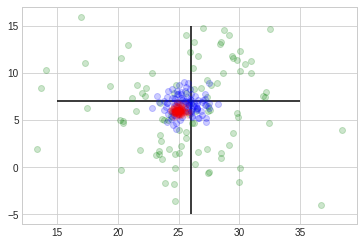

In [214]:
import numpy as np

# define our known location 
y_p = np.array([26,7])
S_p = np.diag([2,4])
n_p = 1000000000 # very large, as we know the statistics exactly
Q_p = np.random.multivariate_normal(y_p, S_p, 100)


# create sampling 1 ... 3
y_A = np.array([25, 6])
S_A = np.diag([0.1, 0.1])
n_A = 100 
Q_A = np.random.multivariate_normal(y_A, S_A, n_A)

y_B = np.array([25.5, 6.5])
S_B = np.diag([20, 20])
n_B = 100
Q_B = np.random.multivariate_normal(y_B, S_B, n_B)

y_C = np.array([25.6, 6.6])
S_C = np.diag([1,1 ])
n_C = 100 
Q_C = np.random.multivariate_normal(y_C, S_C, n_C)


# plot that stuff
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#plt.plot(Q_p[:,0], Q_p[:,1], 'o', color='black', alpha=0.5)

plt.plot(Q_B[:,0], Q_B[:,1], 'o', color='green', alpha=0.2)
plt.plot(Q_C[:,0], Q_C[:,1], 'o', color='blue', alpha=0.2)
plt.plot(Q_A[:,0], Q_A[:,1], 'o', color='red', alpha=0.1)
plt.hlines(7,15,35, "black")
plt.vlines(26,-5,15,  "black")


* black lines = mean location of P (known up to a covariance)

* Red Samples = From Distribution A 
* Green Samples = From distribution B
* Blue Samples = From Distribution C

Intuition:
* Red samples: precisely located at the wrong spot -> probably not from our point p
* Green samples: Mean almost at the right position, but large covariance. Some chance that it is observed from point p
* Blue samples: most likely from our position. But how likely?


let's test this!

In [199]:
def calc_T2(y_1, S_1, n_1, y_2, S_2, n_2):
    return (y_1-y_2).T.dot(np.linalg.inv(S_1/n_1+S_2/n_2)).dot(y_1-y_2)


def v(S_1, n_1, S_2, n_2):
    Sn1 = S_1/n_1
    Sn2 = S_2/n_2
    
    A = ((Sn1+Sn2).dot(Sn1+Sn2)).trace()
    B =  (Sn1+Sn2).trace()**2
    C = ((Sn1.dot(Sn1)).trace() + Sn1.trace() **2)/(n_1-1)
    D = ((Sn2.dot(Sn2)).trace() + Sn2.trace() **2)/(n_2-1)
    
    return (A+B)/(C+D)


Our null hypothesis for each distribution $A,B,C$ is, that the distribution is equal to our point $p$.
We reject null hypothesis for $T2 \geq v$.


In [215]:
# For Distribution A:
t2_A = calc_T2(y_p, S_p, n_p, y_A, S_A, n_A)
v_A = v(S_p, n_p, S_A, n_A)

print(t2_A)
print(v_A)
print(t2_A >= v_A)


1999.9940000199997
99.00059400092401
True


In [216]:
t2_B = calc_T2(y_p, S_p, n_p, y_B, S_B, n_B)
v_B = v(S_p, n_p, S_B, n_B)

print(t2_B)
print(v_B)
print(t2_B >= v_B)


2.4999999625000004
99.00000297000001
False


In [217]:
t2_C = calc_T2(y_p, S_p, n_p, y_C, S_C, n_C)
v_C = v(S_p, n_p, S_C, n_C)

print(t2_C)
print(v_C)
print(t2_C >= v_C)



31.999990400003114
99.00005940000925
False


Conclusion, what does this tell us?

* it is unlikely that distribution A (red) was sampled at point $p$
* It is possible that distribution B (green) was sampled at point $p$
* it is also possible that distribution C (blue) was sampled at point $p$

If we had to select one, which one would you choose?

* Probably the one that is able to explain the data with the smallest covariance?, so in this case this would probably be C
* Could e.g. create a score that relates how close we are to reject the hypothesis with the trace of the covariance matrix, $trace(S)*t2/v$

This would yield the following for distribution B and C (lower = better)


In [219]:
print("B:")
print(S_B.trace()*(t2_B/v_B))

print("C:")
print(S_C.trace()*(t2_C/v_C))

B:
1.010100964646466
C:
0.6464640646468163
